## Data Importing and preprocessing


In [1]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the Data

train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(None, None)

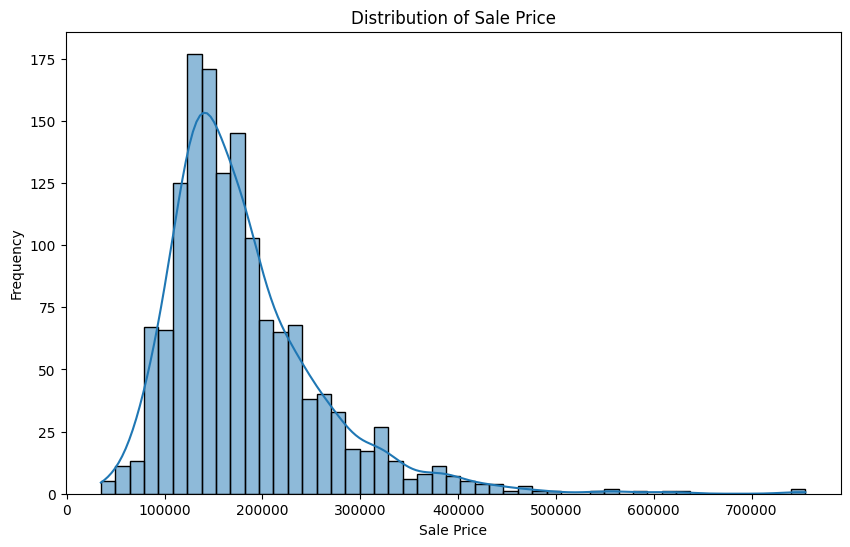

In [5]:
# Distribution of Sales Price Column

plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Select categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns

# Iterate through each categorical column and print the number of unique values
for column in categorical_columns:
    unique_values = train[column].nunique()
    print(f"Number of unique values in {column}: {unique_values}")

Number of unique values in MSZoning: 5
Number of unique values in Street: 2
Number of unique values in Alley: 2
Number of unique values in LotShape: 4
Number of unique values in LandContour: 4
Number of unique values in Utilities: 2
Number of unique values in LotConfig: 5
Number of unique values in LandSlope: 3
Number of unique values in Neighborhood: 25
Number of unique values in Condition1: 9
Number of unique values in Condition2: 8
Number of unique values in BldgType: 5
Number of unique values in HouseStyle: 8
Number of unique values in RoofStyle: 6
Number of unique values in RoofMatl: 8
Number of unique values in Exterior1st: 15
Number of unique values in Exterior2nd: 16
Number of unique values in MasVnrType: 3
Number of unique values in ExterQual: 4
Number of unique values in ExterCond: 5
Number of unique values in Foundation: 6
Number of unique values in BsmtQual: 4
Number of unique values in BsmtCond: 4
Number of unique values in BsmtExposure: 4
Number of unique values in BsmtFi

In [7]:
# Function to drop columns with more than half of values missing from train and test datasets
def drop_columns_with_missing(train_data, test_data):
    initial_cols_train = len(train_data.columns)

    columns_to_drop_train = train_data.columns[train_data.isnull().mean() > 0.5]
    train_data.drop(columns=columns_to_drop_train, inplace=True)

    initial_cols_test = len(test_data.columns)
    test_data.drop(columns=columns_to_drop_train, inplace=True)

    # Calculate deleted columns from train and test data
    deleted_cols_train = initial_cols_train - len(train_data.columns)
    deleted_cols_test = initial_cols_test - len(test_data.columns)

    print(f"Deleted {deleted_cols_train} columns from train data: {', '.join(columns_to_drop_train)}")
    print(f"Deleted {deleted_cols_test} columns from test data.")

# Drop columns with more than half of values missing from train and test datasets
drop_columns_with_missing(train, test)

Deleted 5 columns from train data: Alley, MasVnrType, PoolQC, Fence, MiscFeature
Deleted 5 columns from test data.


In [8]:
# Function to handle missing values in numcerical columns with median and in categorical columns with mode

def handle_missing_values(train_data, test_data):
    numerical_cols_train = train_data.select_dtypes(include=['int64','float64']).columns
    train_data[numerical_cols_train] = train_data[numerical_cols_train].fillna(train_data[numerical_cols_train].median())
    
    categorical_cols_train = train_data.select_dtypes(include = ['object']).columns
    for col in categorical_cols_train:
        train_data[col] = train_data[col].fillna(train_data[col].mode().iloc[0])
        
    numerical_cols_test = test_data.select_dtypes(include=['int64','float64']).columns
    test_data[numerical_cols_test] = test_data[numerical_cols_test].fillna(test_data[numerical_cols_test].median())
    
    categorical_cols_test = test_data.select_dtypes(include = ['object']).columns
    for col in categorical_cols_test:
        test_data[col] = test_data[col].fillna(test_data[col].mode().iloc[0])
        

# Replacing Null values in the data
handle_missing_values(train, test)
        

In [9]:
# Extracting the Saleprice column for y_train
y_train = train['SalePrice']

In [10]:
# Dropping 'SalePrice' column from train and 'Id' column from train and test
train.drop(columns=['SalePrice', 'Id'], inplace=True)
test.drop(columns=['Id'], inplace=True)

original_columns = train.columns.tolist()

# Encoding the Categorical Values
for col in train.select_dtypes(include='object').columns:
    unique_values = train[col].nunique()
    if unique_values > 2:
        # One-hot encoding
        encoder = ce.OneHotEncoder(cols=col, use_cat_names=True)
        train = encoder.fit_transform(train)
        test = encoder.transform(test)
    elif unique_values == 2:
        # Binary encoding
        encoder = ce.BinaryEncoder(cols=col)
        train = encoder.fit_transform(train)
        test = encoder.transform(test)

# Align columns of test set with train set
test = test[train.columns]

# Ensure that train and test have the same columns
assert all(train.columns == test.columns), "Train and test sets don't have the same columns after encoding"

In [11]:
train.head()

,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,LotFrontage,LotArea,Street_0,Street_1,...,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,60,1,0,0,0,0,65.0,8450,0,1,...,0,0,0,0,1,0,0,0,0,0
1,20,1,0,0,0,0,80.0,9600,0,1,...,0,0,0,0,1,0,0,0,0,0
2,60,1,0,0,0,0,68.0,11250,0,1,...,0,0,0,0,1,0,0,0,0,0
3,70,1,0,0,0,0,60.0,9550,0,1,...,0,0,0,0,0,1,0,0,0,0
4,60,1,0,0,0,0,84.0,14260,0,1,...,0,0,0,0,1,0,0,0,0,0


In [12]:
test.head()

,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,LotFrontage,LotArea,Street_0,Street_1,...,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,20,0,0,0,0,1,80.0,11622,0,1,...,0,0,0,0,1,0,0,0,0,0
1,20,1,0,0,0,0,81.0,14267,0,1,...,0,0,0,0,1,0,0,0,0,0
2,60,1,0,0,0,0,74.0,13830,0,1,...,0,0,0,0,1,0,0,0,0,0
3,60,1,0,0,0,0,78.0,9978,0,1,...,0,0,0,0,1,0,0,0,0,0
4,120,1,0,0,0,0,43.0,5005,0,1,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# Creating X_train and X_test for scaling
X_train, X_test = train,test

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training and Evaluation

In [14]:
# Train-test split for evaluation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Training Random Forest
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_split, y_train_split)
rf_val_predictions = rf_regressor.predict(X_val)
rf_val_rmse = mean_squared_error(y_val, rf_val_predictions, squared=False)
print("Random Forest Validation RMSE:", rf_val_rmse)

# Training AdaBoost
ada_regressor = AdaBoostRegressor(random_state=42)
ada_regressor.fit(X_train_split, y_train_split)
ada_val_predictions = ada_regressor.predict(X_val)
ada_val_rmse = mean_squared_error(y_val, ada_val_predictions, squared=False)
print("AdaBoost Validation RMSE:", ada_val_rmse)

Random Forest Validation RMSE: 28813.731821914695
AdaBoost Validation RMSE: 36359.10882304368


In [15]:
xgb_regressor = XGBRegressor(random_state=42,
                             learning_rate=0.2,  # eta
                             n_estimators=100,  # Number of trees
                             max_depth=4,
                             min_child_weight=1,
                             gamma=0,
                             subsample=1,
                             colsample_bytree=1,
                             reg_alpha=0,
                             reg_lambda=1,
                             verbosity=1,
                             objective='reg:squarederror',
                             booster='gbtree',
                             n_jobs=1,
                             importance_type='gain',
                             )
xgb_regressor.fit(X_train_split, y_train_split)
xgb_val_predictions = xgb_regressor.predict(X_val)
xgb_val_rmse = mean_squared_error(y_val, xgb_val_predictions, squared=False)
print("XGBoost Validation RMSE:", xgb_val_rmse)

XGBoost Validation RMSE: 25888.99107064265


In [16]:
# Predicting on test data using XGBoost
y_predicted = xgb_regressor.predict(X_test_scaled)

### Hyperparameter Tuning using Grid SearchCV

In [17]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 1, 2],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 1.0}


In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# XGBoostRegressor with best hyperparameters
xgb_regressor = XGBRegressor(random_state=42,
                             learning_rate=0.2,
                             n_estimators=100,
                             max_depth=3,  # Updated with best value
                             min_child_weight=1,
                             gamma=0,
                             subsample=1.0,  # Updated with best value
                             colsample_bytree=0.8,  # Updated with best value
                             reg_alpha=0,
                             reg_lambda=2,  # Updated with best value
                             verbosity=1,
                             objective='reg:squarederror',
                             booster='gbtree',
                             n_jobs=1,
                             importance_type='gain'
                             )

# Fit the model to training data
xgb_regressor.fit(X_train_split, y_train_split)

# Predict on validation data
xgb_val_predictions = xgb_regressor.predict(X_val)

# Calculate RMSE
xgb_val_rmse = mean_squared_error(y_val, xgb_val_predictions, squared=False)
print("XGBoost Validation RMSE:", xgb_val_rmse)


XGBoost Validation RMSE: 24695.45980959266


### Saving the Predictions in submission file

In [19]:
# Load the original test data with 'Id' column
test_original = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")  # Adjust the file path as needed

# Create a DataFrame with 'Id' and 'SalePrice'
submission_df = pd.DataFrame({'Id': test_original['Id'], 'SalePrice': y_predicted})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)